In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/Users/t2023-m0093/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df = pd.read_excel('car_evaluation.xlsx')
df

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [3]:
# class를 분류하는 분류문제.
df['class'].value_counts()

class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64

In [4]:
# 모델링을 위한 인코딩 작업
X = df.drop(['class'],axis=1)
y = df['class']

In [5]:
# train, test 데이터셋 나누기
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=111)

In [7]:
!pip install category_encoders

  Obtaining dependency information for category_encoders from https://files.pythonhosted.org/packages/7f/e5/79a62e5c9c9ddbfa9ff5222240d408c1eeea4e38741a0dc8343edc7ef1ec/category_encoders-2.6.3-py2.py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.5 MB/s eta 0:00:00


In [8]:
import category_encoders as ce

In [9]:
X.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'], dtype='object')

# 레이블 인코딩 개념 = OrdinalEncoder 사용

In [10]:
encoder = ce.OrdinalEncoder(cols = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])
encoder

OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot',
                     'safety'])

In [11]:
# 인코더 모듈로 train과 test 정리하기
X_train = encoder.fit_transform(X_train)
X_test = encoder.fit_transform(X_test)

In [12]:
X_train

,buying,maint,doors,persons,lug_boot,safety
1288,1,1,1,1,1,1
1056,1,2,1,2,2,2
1188,1,1,2,2,1,2
1099,1,3,2,1,1,1
463,2,4,3,2,2,1
...,...,...,...,...,...,...
681,2,3,3,2,3,2
1299,3,4,2,2,2,2
86,4,4,1,2,2,3
724,2,3,4,1,2,1


In [13]:
X_test

,buying,maint,doors,persons,lug_boot,safety
18,1,1,1,1,1,1
1309,2,1,1,2,2,2
1083,3,2,1,3,2,1
655,4,2,1,3,3,2
282,1,2,2,2,2,1
...,...,...,...,...,...,...
565,4,4,1,1,3,2
1663,2,3,4,2,3,2
538,4,1,3,1,3,2
969,3,1,3,1,3,1


# 랜덤포레스트 모델 진행하기

In [14]:
from sklearn.ensemble import RandomForestClassifier
rfc1 = RandomForestClassifier(n_estimators=10, random_state=111)

In [16]:
# rfc1을 학습시키고 예측값을 확인한다.
rfc1.fit(X_train,y_train)

# train값 예측
y_pred1_train = rfc1.predict(X_train)

# test값 예측
y_pred1_test = rfc1.predict(X_test)

In [17]:
y_pred1_train

array(['acc', 'unacc', 'unacc', ..., 'unacc', 'acc', 'unacc'],
      dtype=object)

In [18]:
y_pred1_test

array(['acc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc',
       'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc',
       'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'acc', 'vgood',
       'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'acc', 'unacc',
       'acc', 'unacc', 'unacc', 'unacc', 'acc', 'acc', 'unacc', 'acc',
       'unacc', 'acc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'acc',
       'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc',
       'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc',
       'unacc', 'acc', 'unacc', 'vgood', 'unacc', 'unacc', 'unacc', 'acc',
       'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'acc', 'unacc',
       'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc',
       'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'good', 'acc', 'unacc',
       'good', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc',
       'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc'

- 정확도 확인하기

In [19]:
from sklearn.metrics import accuracy_score
print('모델 정확도 train {0:0.4f}'.format(accuracy_score(y_train, y_pred1_train)))
print('모델 정확도 test {0:0.4f}'.format(accuracy_score(y_test, y_pred1_test)))

모델 정확도 train 0.9950
모델 정확도 test 0.5087


# RF 모델 튜닝으로 정확도가 올라가는지 확인!

In [20]:
rfc2 = RandomForestClassifier(n_estimators=200,random_state=111)

rfc2.fit(X_train,y_train)

y_pred2_train = rfc2.predict(X_train)
y_pred2_test = rfc2.predict(X_test)

In [21]:
y_pred2_train

array(['acc', 'unacc', 'unacc', ..., 'unacc', 'acc', 'unacc'],
      dtype=object)

In [22]:
y_pred2_test

array(['acc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc',
       'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc',
       'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'acc', 'vgood',
       'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'acc', 'unacc',
       'acc', 'unacc', 'unacc', 'unacc', 'acc', 'acc', 'unacc', 'acc',
       'unacc', 'acc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'acc',
       'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'acc',
       'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc',
       'acc', 'unacc', 'vgood', 'unacc', 'unacc', 'unacc', 'acc', 'unacc',
       'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'acc', 'unacc', 'unacc',
       'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc',
       'unacc', 'unacc', 'unacc', 'good', 'acc', 'unacc', 'good', 'unacc',
       'good', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'acc', 'unacc',
       'unacc', 'unacc', 'acc', 'unacc', 'un

In [23]:
# rfc2 정확도 확인하기
from sklearn.metrics import accuracy_score
print('모델 정확도 train {0:0.4f}'.format(accuracy_score(y_train, y_pred2_train)))
print('모델 정확도 test {0:0.4f}'.format(accuracy_score(y_test, y_pred2_test)))

모델 정확도 train 1.0000
모델 정확도 test 0.5087


# max_depth를 조정한 추가 작업

In [24]:
rfc3 = RandomForestClassifier(n_estimators=200, max_depth=5 ,random_state=111)

rfc3.fit(X_train, y_train)
y_pred3_train =rfc3.predict(X_train)
y_pred3_test = rfc3.predict(X_test)

In [25]:
y_pred3_train

array(['unacc', 'unacc', 'unacc', ..., 'unacc', 'acc', 'unacc'],
      dtype=object)

In [26]:
y_pred3_test

array(['unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc',
       'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc',
       'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc',
       'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc',
       'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'acc', 'acc',
       'unacc', 'acc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc',
       'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc',
       'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc',
       'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'acc', 'unacc', 'unacc',
       'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc',
       'acc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc',
       'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc',
       'acc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc',
       'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 

In [27]:
# rfc3 정확도 확인하기
from sklearn.metrics import accuracy_score
print('모델 정확도 train {0:0.4f}'.format(accuracy_score(y_train, y_pred3_train)))
print('모델 정확도 test {0:0.4f}'.format(accuracy_score(y_test, y_pred3_test)))

모델 정확도 train 0.8147
모델 정확도 test 0.5896


# RF 모델의 feature 중요도 확인하기

In [29]:
feature_score = pd.Series(rfc3.feature_importances_,index=X_train.columns).sort_values(ascending=False)
feature_score

safety      0.374250
persons     0.344959
buying      0.102883
maint       0.084194
lug_boot    0.064433
doors       0.029281
dtype: float64

<Axes: >

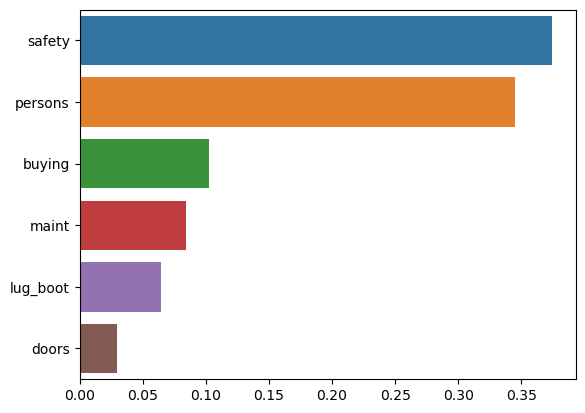

In [30]:
sns.barplot(x = feature_score, y = feature_score.index)

# 정확도 외에 다른 지표들도 확인하기

In [32]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [33]:
df['class'].value_counts()

class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64

In [35]:
print(classification_report(y_test,y_pred3_test))

              precision    recall  f1-score   support

         acc       0.11      0.11      0.11       104
        good       0.00      0.00      0.00        22
       unacc       0.70      0.79      0.74       372
       vgood       0.00      0.00      0.00        21

    accuracy                           0.59       519
   macro avg       0.20      0.22      0.21       519
weighted avg       0.52      0.59      0.55       519



/Users/t2023-m0093/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/t2023-m0093/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/t2023-m0093/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu

# 하이퍼파라미터 튜닝 -> Search 작업
- gridsearch
- bayesian optimization

In [36]:
from sklearn.model_selection import GridSearchCV

In [37]:
# 하이퍼 파라미터를 지정하고 그 안에 grid range를 설정해주기
params = {'max_depth':[5,10,15],'min_samples_leaf':[1,5,10]}

In [38]:
rf_clf = RandomForestClassifier(n_estimators=200,random_state=111)
grid_cv = GridSearchCV(rf_clf, param_grid = params, cv = 5)
grid_cv.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=200,
                                              random_state=111),
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_leaf': [1, 5, 10]})

In [39]:
params

{'max_depth': [5, 10, 15], 'min_samples_leaf': [1, 5, 10]}

In [41]:
grid_cv.best_params_

{'max_depth': 15, 'min_samples_leaf': 1}

In [42]:
'{0:.4f}'.format(grid_cv.best_score_)

'0.8759'

In [43]:
rfc4 = RandomForestClassifier(n_estimators=200,max_depth=15,min_samples_leaf=1,random_state=111)

rfc4.fit(X_train,y_train)

RandomForestClassifier(max_depth=15, n_estimators=200, random_state=111)

In [48]:
y_pred4_train = rfc4.predict(X_train)
y_pred4_test = rfc4.predict(X_test)

In [49]:
y_pred4_train

array(['acc', 'unacc', 'unacc', ..., 'unacc', 'acc', 'unacc'],
      dtype=object)

In [52]:
y_pred4_test

array(['acc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc',
       'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc',
       'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'acc', 'vgood',
       'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'acc', 'unacc',
       'acc', 'unacc', 'unacc', 'unacc', 'acc', 'acc', 'unacc', 'acc',
       'unacc', 'acc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'acc',
       'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'acc',
       'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc',
       'acc', 'unacc', 'vgood', 'unacc', 'unacc', 'unacc', 'acc', 'unacc',
       'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'acc', 'unacc', 'unacc',
       'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc',
       'unacc', 'unacc', 'unacc', 'good', 'acc', 'unacc', 'good', 'unacc',
       'good', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'acc', 'unacc',
       'unacc', 'unacc', 'acc', 'unacc', 'un

In [53]:
from sklearn.metrics import accuracy_score
print('모델 정확도 train {0:0.4f}'.format(accuracy_score(y_train, y_pred4_train)))
print('모델 정확도 test {0:0.4f}'.format(accuracy_score(y_test, y_pred4_test)))

모델 정확도 train 1.0000
모델 정확도 test 0.5087


# 베이지안

In [57]:
!pip install bayesian-optimization

  Obtaining dependency information for bayesian-optimization from https://files.pythonhosted.org/packages/45/cf/3016b660afca02c6ecca3c1cc6d8df3b8f1a6ff4878103204d0aa6b4c769/bayesian_optimization-1.4.3-py3-none-any.whl.metadata


In [58]:
from bayes_opt import BayesianOptimization
from sklearn.model_selection import cross_val_score

In [59]:
def rf_eval(n_estimators, max_depth, min_samples_leaf):
    rfc = RandomForestClassifier(
    n_estimators = int(n_estimators),
    max_depth = int(max_depth),
    min_samples_leaf = int(min_samples_leaf))
    
    return cross_val_score(rfc,X_train,y_train,scoring='accuracy',cv=5).mean()

In [60]:
optimizer = BayesianOptimization(
                f = rf_eval,
                pbounds = {'n_estimators':(100,300),
                           'max_depth':(10,30),
                           'min_samples_leaf':(2,10)},random_state=111)

In [61]:
optimizer.maximize(n_iter=20,init_points=5)

|   iter    |  target   | max_depth | min_sa... | n_esti... |
-------------------------------------------------------------
| 1         | 0.8462    | 22.24     | 3.353     | 187.2     |
| 2         | 0.8304    | 25.39     | 4.363     | 129.8     |
| 3         | 0.8296    | 10.45     | 5.362     | 147.7     |
| 4         | 0.8023    | 16.75     | 9.926     | 147.5     |
| 5         | 0.8056    | 11.62     | 7.357     | 224.2     |
| 6         | 0.8271    | 25.15     | 4.223     | 130.1     |
| 7         | 0.8296    | 22.53     | 4.938     | 188.6     |
| 8         | 0.8602    | 22.76     | 2.617     | 185.5     |
| 9         | 0.8586    | 20.7      | 2.0       | 183.8     |
| 10        | 0.8586    | 24.67     | 2.0       | 181.7     |
| 11        | 0.8131    | 22.41     | 6.676     | 180.8     |
| 12        | 0.8619    | 27.44     | 2.0       | 184.9     |
| 13        | 0.8155    | 29.59     | 7.761     | 124.3     |
| 14        | 0.8635    | 29.76     | 2.494     | 181.0     |
| 15    